In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
bullyData = pd.read_csv("Bullying_2018.csv", delimiter=";")

bullyData.head(5)

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
0,1,Yes,Yes,,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,,,
1,2,No,No,No,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,,,
2,3,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No
3,4,No,No,No,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,,No,No,No,No,No
4,5,No,No,No,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,,,


In [41]:
bullyData.info()
bullyData.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56981 entries, 0 to 56980
Data columns (total 18 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   record                                            56981 non-null  int64 
 1   Bullied_on_school_property_in_past_12_months      56981 non-null  object
 2   Bullied_not_on_school_property_in_past_12_months  56981 non-null  object
 3   Cyber_bullied_in_past_12_months                   56981 non-null  object
 4   Custom_Age                                        56981 non-null  object
 5   Sex                                               56981 non-null  object
 6   Physically_attacked                               56981 non-null  object
 7   Physical_fighting                                 56981 non-null  object
 8   Felt_lonely                                       56981 non-null  object
 9   Close_friends               

record                                              0
Bullied_on_school_property_in_past_12_months        0
Bullied_not_on_school_property_in_past_12_months    0
Cyber_bullied_in_past_12_months                     0
Custom_Age                                          0
Sex                                                 0
Physically_attacked                                 0
Physical_fighting                                   0
Felt_lonely                                         0
Close_friends                                       0
Miss_school_no_permission                           0
Other_students_kind_and_helpful                     0
Parents_understand_problems                         0
Most_of_the_time_or_always_felt_lonely              0
Missed_classes_or_school_without_permission         0
Were_underweight                                    0
Were_overweight                                     0
Were_obese                                          0
dtype: int64

In [42]:
bullyData.replace(r'^\s*$', np.nan, regex=True, inplace=True)
bullyData.isnull().sum()

record                                                  0
Bullied_on_school_property_in_past_12_months         1239
Bullied_not_on_school_property_in_past_12_months      489
Cyber_bullied_in_past_12_months                       571
Custom_Age                                            108
Sex                                                   536
Physically_attacked                                   240
Physical_fighting                                     268
Felt_lonely                                           366
Close_friends                                        1076
Miss_school_no_permission                            1864
Other_students_kind_and_helpful                      1559
Parents_understand_problems                          2373
Most_of_the_time_or_always_felt_lonely                366
Missed_classes_or_school_without_permission          1864
Were_underweight                                    20929
Were_overweight                                     20929
Were_obese    

In [43]:
bullyData.columns = [
    'ID', 'School_bully', 'Outside_school_bully', 'Cyber_bully', 'Age', 'Sex',
    'Physically_attacked', 'Physical_fighting', 'Lonely', 'Close_friends',
    'Miss_school', 'Other_students_kind_and_helpful', 'Parents_understands',
    'Felt_lonely', 'Missed_classes_or_school', 'Underweight', 'Overweight',
    'Obese'
]

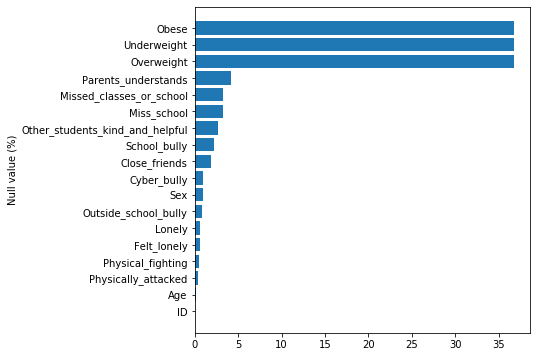

In [44]:
null_percentage = (bullyData.isnull().sum() / len(bullyData)) * 100
null_percentage = null_percentage.sort_values()
fig, ax = plt.subplots(figsize=(6,6))
ax.barh(null_percentage.index, null_percentage.values)
ax.set_ylabel("Null value (%)")
plt.show()


In [60]:
UW_count = bullyData['Underweight'].value_counts()
OW_count = bullyData['Overweight'].value_counts()
Obese_count = bullyData['Obese'].value_counts()

def check_rate(counter):
    rate = counter['No'] / counter['Yes']
    print(counter/counter.sum())

# print(UW_count)
# print(OW_count)
# print(Obese_count)

In [62]:
check_rate(UW_count)
check_rate(OW_count)
check_rate(Obese_count)

No     0.979668
Yes    0.020332
Name: Underweight, dtype: float64
No     0.7039
Yes    0.2961
Name: Overweight, dtype: float64
No     0.926356
Yes    0.073644
Name: Obese, dtype: float64


In [65]:
bullyClean = bullyData.dropna()
bullyClean

,ID,School_bully,Outside_school_bully,Cyber_bully,Age,Sex,Physically_attacked,Physical_fighting,Lonely,Close_friends,Miss_school,Other_students_kind_and_helpful,Parents_understands,Felt_lonely,Missed_classes_or_school,Underweight,Overweight,Obese
2,3,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No
5,6,No,No,No,13 years old,Male,0 times,1 time,Never,3 or more,0 days,Most of the time,Always,No,No,No,No,No
10,11,No,No,No,15 years old,Male,0 times,1 time,Never,3 or more,3 to 5 days,Most of the time,Always,No,Yes,No,No,No
22,23,No,No,Yes,13 years old,Male,0 times,2 or 3 times,Most of the time,3 or more,0 days,Rarely,Always,Yes,No,No,No,No
23,24,No,No,No,14 years old,Male,0 times,2 or 3 times,Most of the time,2,0 days,Always,Sometimes,Yes,No,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56972,57087,No,Yes,No,16 years old,Male,0 times,0 times,Rarely,3 or more,3 to 5 days,Rarely,Most of the time,No,Yes,No,No,No
56974,57089,No,No,No,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No
56975,57090,No,No,Yes,15 years old,Male,12 or more times,2 or 3 times,Rarely,3 or more,0 days,Most of the time,Sometimes,No,No,No,No,No
56976,57091,No,Yes,No,16 years old,Male,0 times,4 or 5 times,Sometimes,3 or more,0 days,Sometimes,Sometimes,No,No,No,Yes,No


In [64]:
bullyClean.isnull().sum()

ID                                 0
School_bully                       0
Outside_school_bully               0
Cyber_bully                        0
Age                                0
Sex                                0
Physically_attacked                0
Physical_fighting                  0
Lonely                             0
Close_friends                      0
Miss_school                        0
Other_students_kind_and_helpful    0
Parents_understands                0
Felt_lonely                        0
Missed_classes_or_school           0
Underweight                        0
Overweight                         0
Obese                              0
dtype: int64

In [74]:
bullyData['Age'].value_counts() / bullyData['Age'].value_counts().sum()


14 years old               0.227630
15 years old               0.225274
16 years old               0.206390
13 years old               0.185923
17 years old               0.144656
18 years old or older      0.006734
12 years old               0.002550
11 years old or younger    0.000844
Name: Age, dtype: float64

In [73]:
bullyClean['Age'].value_counts() / bullyClean['Age'].value_counts().sum()

16 years old               0.231070
15 years old               0.223116
14 years old               0.211519
17 years old               0.166221
13 years old               0.158996
18 years old or older      0.007013
12 years old               0.001700
11 years old or younger    0.000364
Name: Age, dtype: float64

In [75]:
bullyClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32938 entries, 2 to 56980
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ID                               32938 non-null  int64 
 1   School_bully                     32938 non-null  object
 2   Outside_school_bully             32938 non-null  object
 3   Cyber_bully                      32938 non-null  object
 4   Age                              32938 non-null  object
 5   Sex                              32938 non-null  object
 6   Physically_attacked              32938 non-null  object
 7   Physical_fighting                32938 non-null  object
 8   Lonely                           32938 non-null  object
 9   Close_friends                    32938 non-null  object
 10  Miss_school                      32938 non-null  object
 11  Other_students_kind_and_helpful  32938 non-null  object
 12  Parents_understands             

In [76]:
bullyClean['Age'] = bullyClean['Age'].str.split().str[0].astype(int)


c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
bullyClean = bullyClean.replace({'No': 0, 'Yes': 1})


In [90]:
bullyClean['Physically_attacked'].value_counts()


0 times             27461
1 time               3003
2 or 3 times         1345
4 or 5 times          408
12 or more times      403
6 or 7 times          166
8 or 9 times           95
10 or 11 times         57
Name: Physically_attacked, dtype: int64

In [95]:
for i in bullyClean:
    print(bullyClean[i].value_counts())

2047     1
23937    1
26054    1
28103    1
5576     1
        ..
21151    1
43680    1
41633    1
35492    1
4098     1
Name: ID, Length: 32938, dtype: int64
0    26068
1     6870
Name: School_bully, dtype: int64
0    25625
1     7313
Name: Outside_school_bully, dtype: int64
0    25558
1     7380
Name: Cyber_bully, dtype: int64
16    7611
15    7349
14    6967
17    5475
13    5237
18     231
12      56
11      12
Name: Age, dtype: int64
Female    17679
Male      15259
Name: Sex, dtype: int64
0 times             27461
1 time               3003
2 or 3 times         1345
4 or 5 times          408
12 or more times      403
6 or 7 times          166
8 or 9 times           95
10 or 11 times         57
Name: Physically_attacked, dtype: int64
0 times             25496
1 time               3884
2 or 3 times         2045
4 or 5 times          563
12 or more times      466
6 or 7 times          267
8 or 9 times          133
10 or 11 times         84
Name: Physical_fighting, dtype: int64
Never  

In [100]:
"""
5 levels of frequency: 
    'Never', '0 times' ---- 0
    'Rarely', '1 time', '2 or 3 times' ---- 1
    'Sometimes', '4 or 5 times', '6 or 7 times' ---- 2
    'Most of the time', '8 or 9 times', '10 or 11 times' ---- 3
    'Always', '12 or more times' ---- 4
"""
bullySimplified = bullyClean.replace({
    'Never': 0,
    '0 times': 0,
    '0 days': 0,
    'Rarely': 1,
    '1 time': 1,
    '2 or 3 times': 1,
    '1 or 2 days': 1,
    'Sometimes': 2,
    '4 or 5 times': 2,
    '6 or 7 times': 2,
    '3 to 5 days': 2,
    'Most of the time': 3,
    '8 or 9 times': 3,
    '10 or 11 times': 3,
    '6 to 9 days': 3,
    'Always': 4,
    '12 or more times': 4,
    '10 or more days': 4,
})
bullySimplified['Close_friends'] = bullySimplified['Close_friends'].replace({
    '0': 0,
    '1': 1,
    '2': 2,
    '3 or more': 3,
})
bullySimplified['Sex'] = bullySimplified['Sex'].replace({
    'Female': 0,
    'Male': 1
})

In [101]:
bullySimplified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32938 entries, 2 to 56980
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               32938 non-null  int64
 1   School_bully                     32938 non-null  int64
 2   Outside_school_bully             32938 non-null  int64
 3   Cyber_bully                      32938 non-null  int64
 4   Age                              32938 non-null  int32
 5   Sex                              32938 non-null  int64
 6   Physically_attacked              32938 non-null  int64
 7   Physical_fighting                32938 non-null  int64
 8   Lonely                           32938 non-null  int64
 9   Close_friends                    32938 non-null  int64
 10  Miss_school                      32938 non-null  int64
 11  Other_students_kind_and_helpful  32938 non-null  int64
 12  Parents_understands              32938 non-nul

In [111]:
bullySimplified['School_bully'].value_counts()

0    26068
1     6870
Name: School_bully, dtype: int64

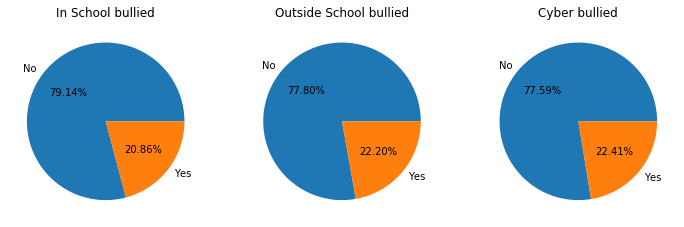

In [125]:
Scl, outScl, Cyb = bullySimplified['School_bully'].value_counts(), bullySimplified['Outside_school_bully'].value_counts(), bullySimplified['Cyber_bully'].value_counts()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 12))
ax1.pie(Scl, labels = ['No', 'Yes'],autopct='%1.2f%%')
ax1.title.set_text('In School bullied')
ax2.pie(outScl, labels=['No', 'Yes'], autopct='%1.2f%%')
ax2.title.set_text('Outside School bullied')
ax3.pie(Cyb, labels=['No', 'Yes'], autopct='%1.2f%%')
ax3.title.set_text('Cyber bullied')
plt.show()

In [136]:
bulliedKinds = {0:0,1:0,2:0,3:0}
isBullied = []
for i in bullySimplified.index:
    kinds = bullySimplified.loc[i]['School_bully']+bullySimplified.loc[i]['Outside_school_bully']+bullySimplified.loc[i]['Cyber_bully']
    bulliedKinds[kinds] += 1
    if kinds>0:
        isBullied.append(1)
    else:
        isBullied.append(0)
print(bulliedKinds)

{0: 19553, 1: 7423, 2: 3746, 3: 2216}


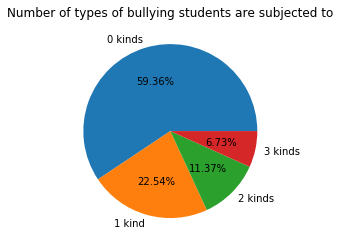

In [138]:
plt.pie(bulliedKinds.values(), labels=['0 kinds','1 kind','2 kinds','3 kinds'],autopct='%1.2f%%')
plt.title('Number of types of bullying students are subjected to')
plt.show()

In [140]:
bullySimplified['bullied'] = isBullied

In [141]:
from collections import Counter
Counter(bullySimplified['bullied'])

Counter({0: 19553, 1: 13385})

In [142]:
corr = bullySimplified.corr(method='pearson')


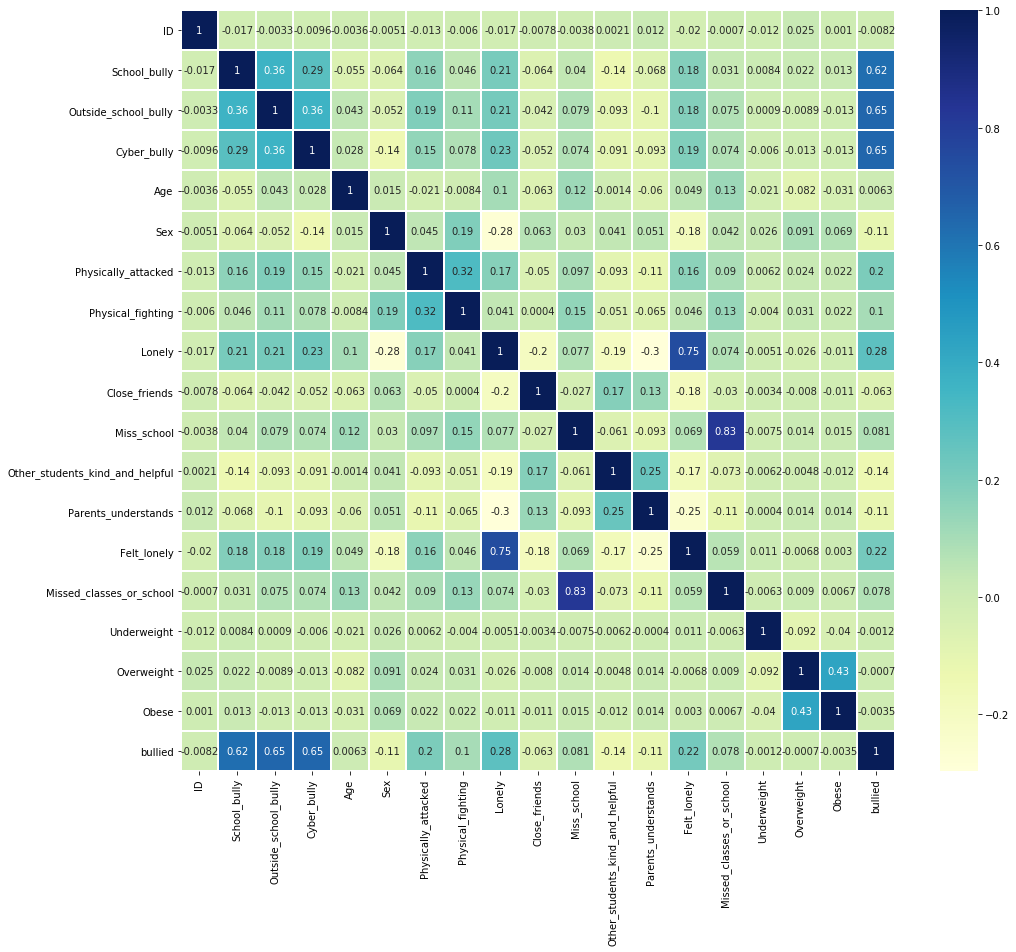

In [152]:
plt.figure(figsize=(16,14))
sns.heatmap(corr.round(4), cmap='YlGnBu', linewidths=1, annot=True)


In [179]:
bullied = bullySimplified.loc[bullySimplified['bullied'] == 1, bullySimplified.columns[4:]]
bullied
# bCorr = bullied.corr(method='pearson')
# plt.figure(figsize=(16, 14))
# sns.heatmap(bCorr.round(4), cmap= 'icefire', linewidths=1, annot=True)

,Age,Sex,Physically_attacked,Physical_fighting,Lonely,Close_friends,Miss_school,Other_students_kind_and_helpful,Parents_understands,Felt_lonely,Missed_classes_or_school,Underweight,Overweight,Obese,bullied
22,13,1,0,1,3,3,0,1,4,1,0,0,0,0,1
39,13,0,0,1,1,3,0,3,3,0,0,0,0,0,1
41,13,1,0,1,1,3,0,3,3,0,0,0,1,0,1
42,15,1,1,0,0,3,0,0,2,0,0,0,0,0,1
45,13,0,0,0,2,3,0,1,4,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56971,16,1,0,0,3,3,0,2,1,1,0,0,0,0,1
56972,16,1,0,0,1,3,2,1,3,0,1,0,0,0,1
56975,15,1,4,1,1,3,0,3,2,0,0,0,0,0,1
56976,16,1,0,2,2,3,0,2,2,0,0,0,1,0,1


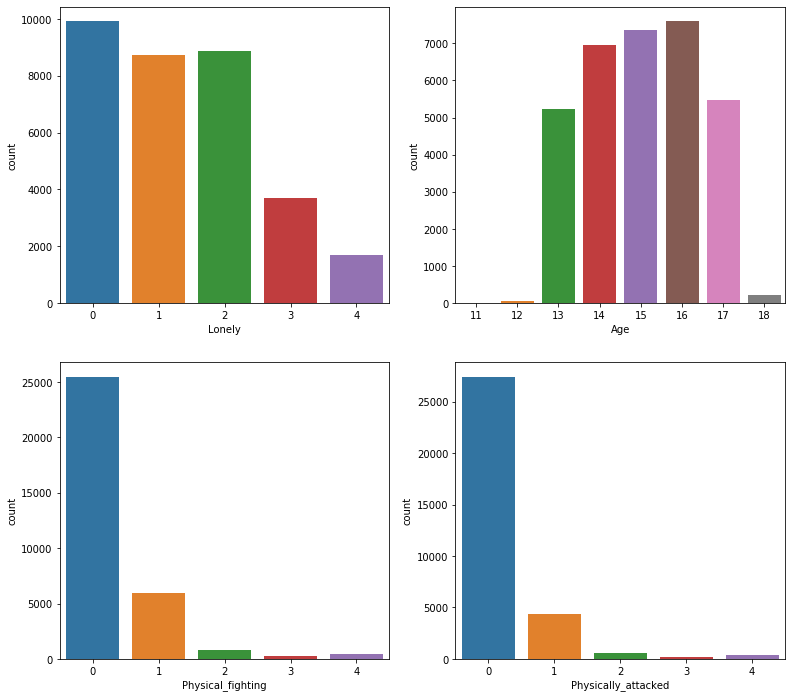

In [182]:
fig, axes = plt.subplots(2,2,figsize = (13,12))
sns.countplot(bullySimplified['Lonely'], ax=axes[0, 0])
sns.countplot(bullySimplified['Age'], ax=axes[0, 1])
sns.countplot(bullySimplified['Physical_fighting'],
              ax=axes[1, 0])
sns.countplot(bullySimplified['Physically_attacked'], ax=axes[1, 1])
plt.show()


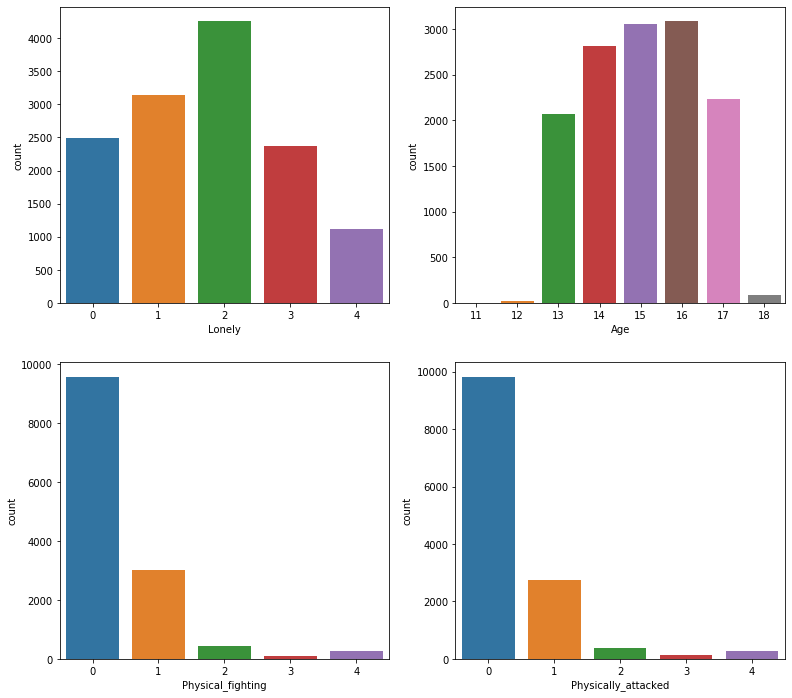

In [183]:
fig, axes = plt.subplots(2, 2, figsize=(13, 12))
sns.countplot(bullied['Lonely'], ax=axes[0, 0])
sns.countplot(bullied['Age'], ax=axes[0, 1])
sns.countplot(bullied['Physical_fighting'], ax=axes[1, 0])
sns.countplot(bullied['Physically_attacked'], ax=axes[1, 1])
plt.show()